<a href="https://colab.research.google.com/github/jee9894/DeepLearningStudy/blob/master/%EB%8B%A8%EC%9D%BC_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%B0%B0%EC%B9%98%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)

In [3]:
print(x_train.shape, x_val.shape )

(364, 30) (91, 30)


In [0]:
class SingleLayer:
  def __init__(self, learning_rate = 0.1, l1 = 0, l2 = 0):
    self.w = None
    self.b = None
    self.losses = []
    self.val_losses = []
    self.w_history = []
    self.lr = learning_rate
    self.l1 = l1
    self.l2 = l2

  # 직선 방정식 계산
  def forpass(self, x):
    z = np.dot(x, self.w) + self.b
    return z

  # 그레디언트 계산
  def backprop(self, x, err):
    m = len(x)
    w_grad = np.dot(x.T, err) / m
    b_grad = np.sum(err) / m
    return w_grad, b_grad

  # 활성화 함수(시그모이드 함수) 적용하여 반환
  def activation(self, z):
    # np.exp는 수학적으로 안전하지 못하여 작은수나 큰수를 clip
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs = 100, x_val = None, y_val = None):
    # 타깃과 검증용 타깃을 열 벡터로 바꿈
    y = y.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)

    m = len(x)
    self.w = np.ones((x.shape[1], 1))
    self.b = 0
    self.w_history.append(self.w.copy())

    for i in range(epochs):
      z = self.forpass(x)
      a = self.activation(z)
      err = -(y - a)
      # 오차를 역저뉴ㅏ 하여 그레디언트 계산
      w_grad, b_grad = self.backprop(x, err)  
      # 그레디언트에 L1, L2 패널티항의 미분값을 더함
      w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
      # 가중치, 절편 업데이트
      self.w -= w_grad * self.lr
      self.b -= b_grad * self.lr
      # 가중치 기록
      self.w_history.append(self.w.copy( ))
      a = np.clip(a, 1e-10, 1-1e-10)
      # 에포크마다 평균 손실 저장
      loss = np.sum(-(y*np.log(a)+(1-y)*np.log(1-a)))
      self.losses.append((loss + self.reg_loss()) / m)
      # 검증 세트에 대한 손실 계산
      self.update_val_loss(x_val, y_val)
  
  # 예측치 y^를 알기위한 메소드 
  def predict(self, x):
    z = self.forpass(x)
    return z > 0

  # 정확도 계산
  def score(self, x, y):
    return np.mean(self.predict(x) == y.reshape(-1, 1))

  def reg_loss(self):
    # 가중치에 규제 적용
    return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)

  def update_val_loss(self, x_val, y_val):
    z = self.forpass(x_val)
    a = self.activation(z)
    a = np.clip(a, 1e-10, 1-1e-10)
    # 로그 손실과 규제 손실을 더하여 리스트에 추가
    val_loss = np.sum(-(y*np.log(a)+(1-y)*np.log(1-a)))
    self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [14]:
single_layer = SingleLayer(l2 = 0.01)
single_layer.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val, epochs = 10000)
single_layer.score(x_val_scaled, y_val)

0.978021978021978

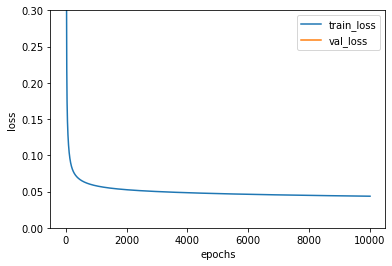

In [15]:
# 손실 그래프
plt.ylim(0, 0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'])
plt.show()

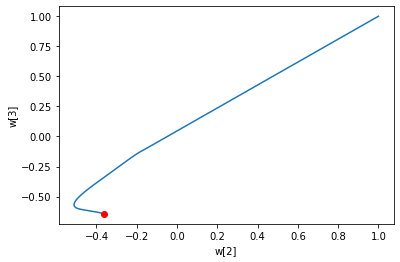

In [17]:
# 가중치 변화 그래프
w2 = []
w3 = []
for w in single_layer.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()